<a href="https://colab.research.google.com/github/Vict0r-13/Projeto-ML-Recomenda-o-de-Livros/blob/main/Metodologia%2C_Resultados_e_Discuss%C3%A3o_(Segunda_parte).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

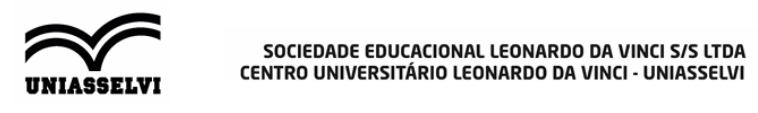

**Nomes dos Acadêmicos:** Bruno Muller, Bruno Martinez, Caio Nolasco, Ivanildo Victor, Joyci dos Santos.

**Matrículas:** 4018331, 4142249,3064376, 4963502, 4512482.

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina -  Etapa II


>## Objetivo


*Esse projeto tem como objetivo aplicar algoritmos de machine learning utilizando 3 tipos de modelos matemáticos mais utilizados por analistas de dados, identificando as melhores recomendaçoes de livros avaliados por usuários na plataforma AWS ( Amazon Web Services).*


>## Especificação Técnica

<p align="justify">

**Dataset:** Para desenvolvimento desse projeto, será utilizado um dataset de 8.7MB e possui um total de 73.325 mil linhas após ETL.

**Formato:** A base de dados está em formato CSV, estando divivido em 9 colunas (features) conforme segue: User-ID, ISBN, Book Rating, Location, Age, Book-Title , Book-Author, Year-Of-Publication e Publisher.

( O ISBN (International Standard Book Number/ Padrão Internacional de Numeração de Livro) é um padrão numérico criado com o objetivo de fornecer uma espécie de "RG" para publicações monográficas, como livros, artigos e apostilas. A difusão global do ISBN e a facilidade com que é lido por redes de varejo, bibliotecas e sistemas gerais de catalogação, tornou-o imprescindível para qualquer publicação).

As features utilizadas pelos métodos (treinamento e teste) são: User-ID, Location, Book-Rating e Year-Of-Publication.

A feature Book-Rating é responsável por clasificar os livros com as melhores avaliaçoes dadas pelos leitores . Utilizando uma escala de 1 ao 10 dando referencia a 1 como a menor relevancia e 10 a maior relevancia.




**Combinações para treinamento e teste será:** 80% treino e 20% teste.

**DESCRIÇÃO DAS FEATURES:**
User-ID: *Identificação do Usuário (numérico).*

ISBN: *(International Standard Book Number/ Padrão Internacional de Numeração de Livro)  (numérico)*

Book Rating: *Avaliação atribuída por parte do leitor (numérico).*

Location: *Descreve a region geografica (cidade e país) onde o leitor adquiriu o livro  (letra).*

Age: *Idades dos leitores.*

Book-Title: *Descreve o titulo do livro.*

Book-Author: *Autor do livro.*

Year-Of-Publication: *Nos indica o ano de publicação do livro.*

Publisher: Editora do Livro.


**Métodos de Pré-processamento:** O processo de ETL dos dados teve início com a integração das identificações de usuários (User-ID) dos conjuntos de dados 'Users' e 'Ratings'. Essa etapa foi essencial para reunir todas as informações relacionadas aos usuários, viabilizando a união dos registros de livros que cada usuário leu e avaliou em um único arquivo.

Posteriormente, foi realizada uma operação similar para as identificações dos livros (ISBN) nos conjuntos de dados 'Ratings' e 'Books'. Esse procedimento visava assegurar que o arquivo resultante do processamento contemplasse corretamente todas as informações referentes aos livros que foram lidos e avaliados por cada usuário.

**Tarefa de Aprendizado:** Será aplicado a tarefa de Random
Forest, KNN e Arvore de decisão.

**Métricas utilizadas:** Acurácia, Matriz correlacional e agrupamentos de dados semelhantes.



>## Pré-Processamento

Aplicar os métodos de pré-processamento:

**Método utilizado:**Foi realizada a limpeza dos dados utilizando nosso arquivo limpeza_dados.ipynb (anexado no arquivo zipado) , onde serão removidos espaços em branco e zerados. Foram removidas as idades acima de 97 anos como tambem removemos as avaliações com nota 0.
Para espaços em branco a remoção foi feita de forma direta no arquivo .csv utilizando os filtros do proprio MS Excel.
As colunas (dataframe) Image-URL-S, Image-URL-M e Image-URL-L foram removidas utilizando pandas.DataFrame.drop




In [ ]:
import pandas as pd

# Carregar os arquivos CSV
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')
books = pd.read_csv('Books.csv')

# Mesclar Ratings com Users usando o User-ID como chave
merged_data = pd.merge(ratings, users, on='User-ID')

# Mesclar os dados combinados com Books usando o ISBN como chave
final_data = pd.merge(merged_data, books, on='ISBN')

# Lista das colunas que deseja excluir
colunas_a_excluir = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']
final_data = final_data.drop(columns=colunas_a_excluir)

# Exibir as primeiras linhas dos dados combinados
display(final_data.head())

# Salvar os dados combinados em um novo arquivo CSV
final_data.to_csv('dados_combinados.csv', index=False)

In [ ]:
import pandas as pd

# Carregar os dados combinados do arquivo CSV
dados_combinados = pd.read_csv('dados_combinados.csv', dtype={'Year-Of-Publication': 'str'})

# Excluir linhas onde 'Age' é NaN
dados_combinados = dados_combinados.dropna(subset=['Age'])

# Excluir 'Age' menor que 10 e maior que 97
dados_combinados = dados_combinados[(dados_combinados['Age'] >= 10) & (dados_combinados['Age'] <= 97)]

# Excluir linhas onde 'Book-Rating' é igual a 0
dados_combinados = dados_combinados[dados_combinados['Book-Rating'] != 0]

# Converter 'Age' para inteiros e remover casas decimais
dados_combinados['Age'] = dados_combinados['Age'].astype(int)

# Limpar 'Year-Of-Publication' de caracteres não numéricos
dados_combinados['Year-Of-Publication'] = dados_combinados['Year-Of-Publication'].str.extract('(\d+)')

# Converter 'Year-Of-Publication' para inteiros e excluir anos maiores que 2023
dados_combinados['Year-Of-Publication'] = pd.to_numeric(dados_combinados['Year-Of-Publication'], errors='coerce')
dados_combinados = dados_combinados[dados_combinados['Year-Of-Publication'] <= 2023]

# Converter 'Year-Of-Publication' para inteiros
dados_combinados['Year-Of-Publication'] = dados_combinados['Year-Of-Publication'].astype(int)

# Exibir as primeiras linhas dos dados após as limpezas
display(dados_combinados.head())

# Salvar os dados limpos em um novo arquivo CSV
dados_combinados.to_csv('dados_limpos_6.csv', index=False)

In [ ]:
# Verificar se existem dados nulos ou vazios em alguma coluna
dados_nulos = dados_combinados.isnull().sum()

# Exibir a contagem de valores nulos por coluna
print(dados_nulos)


In [ ]:
# Excluir linhas com valores nulos nas colunas 'Book-Author' e 'Publisher'
dados_combinados = dados_combinados.dropna(subset=['Book-Author', 'Publisher'])

# Verificar novamente se existem dados nulos após a exclusão
dados_combinados_atualizados = dados_combinados.isnull().sum()
print(dados_combinados_atualizados)

In [ ]:
# Salvar os dados limpos em um novo arquivo CSV
dados_combinados_atualizados.to_csv('dados_limpos_6.csv', index=False)

**A seguir, os códigos com as tres tecnicas de Machine Learinig escolhida para conseguir nosso resultado:**

>## Arvore de Decisão

 **Primeira etapa**

Se diferentes usuários têm um número significativo de autores em comum que ambos leram, você quer sugerir livros para um usuário com base nos autores que outros usuários leram e ele ainda não leu. Isso envolve a identificação de padrões entre os autores lidos por diferentes usuários para recomendar novos livros.

In [ ]:
import pandas as pd

# Carregar os dados de leitura dos usuários
dados_leitura = pd.read_csv('dados_limpos_6.csv', sep=";")

# Verificar se há avaliações duplicadas pelo mesmo usuário
duplicatas = dados_leitura[dados_leitura.duplicated(subset=['User-ID', 'ISBN'], keep=False)]

# Exibir as linhas duplicadas (se existirem)
if duplicatas.empty:
    print("Não há avaliações duplicadas pelo mesmo usuário.")
else:
    print("Avaliações duplicadas pelo mesmo usuário encontradas:")
    display(duplicatas)


ParserError: ignored

In [ ]:
import pandas as pd

# Carregar os dados de leitura dos usuários
dados_leitura = pd.read_csv('dados_limpos_6.csv', sep=";")

# Verificar se há avaliações duplicadas para o mesmo livro por diferentes usuários
duplicatas_dif_usuarios = dados_leitura[dados_leitura.duplicated(subset=['ISBN'], keep=False)]

# Contar o número de avaliações duplicadas para o mesmo livro por diferentes usuários
numero_duplicatas = len(duplicatas_dif_usuarios)

# Exibir a contagem de linhas duplicadas
print(f"Total de avaliações duplicadas para o mesmo livro por diferentes usuários: {numero_duplicatas}")

ParserError: ignored

In [ ]:
# Criar uma matriz de usuários versus autores
matriz_usuarios_autores = pd.get_dummies(dados_leitura['Book-Author']).groupby(dados_leitura['User-ID']).max()

# Visualizar a matriz de usuários versus autores
display(matriz_usuarios_autores.head())

In [ ]:
from sklearn.model_selection import train_test_split

# Selecionar características relevantes
caracteristicas = dados_leitura[['Age', 'Book-Author']]

# Selecionar a variável de saída (Book-Rating neste caso)
perfil_usuario = dados_leitura['Book-Rating']

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, perfil_usuario, test_size=0.2, random_state=42)

**Árvore de Decisão**


Esse código realiza o treinamento de um modelo de Árvore de Decisão para fazer previsões sobre a recomendação de livros com base nas características dos usuários (idade) e nas avaliações dos livros.



*   Carrega os dados do arquivo 'dados_limpos_6.csv' para um DataFrame do pandas.
*   Seleciona as características relevantes para treinar o modelo, neste caso, 'Age' (idade dos usuários) e 'Book-Rating' (avaliações dos livros).
*   Define a variável alvo como 'Book-Rating', que representa a recomendação do livro.
*   Divide os dados em conjuntos de treinamento (80%) e teste (20%).
Inicializa um modelo de Árvore de Decisão.

*   Treina o modelo com os dados de treinamento.
*   Faz previsões utilizando os dados de teste.
*   Avalia a precisão do modelo usando a função accuracy_score.
*   Gera e exibe um relatório de classificação usando classification_report para detalhar precisão, recall, f1-score e suporte para cada classe.
*   Cria e exibe uma matriz de confusão para visualizar as previsões corretas e erradas feitas pelo modelo.

A maioria dos algoritmos de aprendizado de máquina, incluindo árvores de decisão, trabalha com dados numéricos. Isso ocorre porque as fórmulas matemáticas e estatísticas subjacentes a esses algoritmos são mais adequadas para lidar com números do que com texto ou dados categóricos.

Quando lidamos com texto ou strings, é comum usar técnicas de pré-processamento, como encoding (transformação de texto em números), para permitir que esses dados sejam usados em modelos de aprendizado de máquina. No entanto, o processamento de grandes conjuntos de texto pode aumentar significativamente a dimensionalidade dos dados e exigir muitos recursos computacionais.

In [ ]:
# Obter os valores únicos de idade e suas contagens
contagem_idades = dados['Age'].value_counts()

# Ordenar os valores únicos de idade em ordem crescente
idades_unicas_ordenadas = contagem_idades.sort_index()

# Exibir os valores únicos de idade e suas contagens em ordem crescente
print("Valores únicos de idade e suas contagens (em ordem crescente):")
print(idades_unicas_ordenadas)

In [ ]:
import pandas as pd

# Criar faixas etárias
faixas_etarias = pd.cut(
    dados['Age'],
    bins=[14, 18, 22, 28, 33, 46, 71],  # Ajustar os limites das faixas conforme necessário
    labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6']
)
# Adicionar os grupos de faixa etária ao DataFrame
dados['Faixa_Etaria'] = faixas_etarias

# Visualizar as contagens de usuários em cada faixa etária
contagem_faixa_etaria = dados['Faixa_Etaria'].value_counts()


display(dados.head())

dados.to_csv('dados_arvore.csv', index=False)

Etapa 2

Vamos separar um grupo de 10 autores mais lidos por Faixa_Etaria, para assim conseguirmos trabalhar com Arvore de decisão.

In [ ]:
import pandas as pd

# Carregar o DataFrame com os dados modificados
dados_modificados = pd.read_csv('dados_arvore.csv')

# Criar um DataFrame relacionando a faixa etária com a idade média
relacao_idade_faixa_etaria = dados_modificados.groupby('Faixa_Etaria')['Age'].mean().reset_index()

# Exibir a relação entre a faixa etária e a idade média correspondente
display(relacao_idade_faixa_etaria)

In [ ]:
import pandas as pd

# Carregar o DataFrame com os dados modificados
dados_modificados = pd.read_csv('dados_arvore.csv')

# Calcular a contagem de leituras de cada autor para cada grupo de faixa etária
autores_por_grupo_etario = dados_modificados.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')

# Ordenar os autores por contagem em cada grupo de faixa etária
autores_por_grupo_etario.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False], inplace=True)

# Selecionar os 50 autores mais lidos em cada faixa etária
autores_top_por_grupo_etario = autores_por_grupo_etario.groupby('Faixa_Etaria').head(50)

# Exibir os autores mais lidos em cada faixa etária
display(autores_top_por_grupo_etario)

In [ ]:
import pandas as pd

# Carregar o DataFrame com os dados modificados
dados_modificados = pd.read_csv('dados_arvore.csv')

# Calcular a contagem de leituras de cada autor para cada grupo de faixa etária
autores_por_grupo_etario = dados_modificados.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')

# Ordenar os autores por contagem em cada grupo de faixa etária
autores_por_grupo_etario.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False], inplace=True)

# Selecionar os 50 autores mais lidos em cada faixa etária
autores_top_por_grupo_etario = autores_por_grupo_etario.groupby('Faixa_Etaria').head(50)

# Criar um dicionário para mapear cada grupo de faixa etária ao identificador desejado
grupo_autor = {}
identificador = 100  # Identificador inicial
for grupo in autores_top_por_grupo_etario['Faixa_Etaria'].unique():
    grupo_autor[grupo] = identificador
    identificador += 100  # Incrementar o identificador

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)

# Exibir os autores mais lidos em cada faixa etária com o identificador do grupo de autor
display(autores_top_por_grupo_etario)

In [ ]:
# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
#autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)

# Exibir os autores mais lidos em cada faixa etária com o identificador do grupo de autor
#display(autores_top_por_grupo_etario)

# Salvar o DataFrame atualizado em um novo arquivo CSV
# autores_top_por_grupo_etario.to_csv('autores_top_por_grupo_etario.csv', index=False)


In [ ]:
import pandas as pd

# Carregar o DataFrame com os dados originais
dados_arvore = pd.read_csv('dados_arvore.csv')

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
dados_arvore['Identificador_Grupo_Autor'] = dados_arvore['Faixa_Etaria'].map(grupo_autor)

display(dados_arvore.head())
# Salvar o DataFrame atualizado no mesmo arquivo CSV
dados_arvore.to_csv('dados_arvore_2.csv', index=False)

In [ ]:
import pandas as pd

dados_arvore_2 = pd.read_csv('dados_arvore_2.csv')
display(dados_arvore_2.head())

In [ ]:
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_2.csv')

# Mapear os valores da coluna Faixa_Etaria para 1, 2, 3, ...
mapeamento = {
    'Grupo 1': 1,
    'Grupo 2': 2,
    'Grupo 3': 3,
    'Grupo 4': 4,
    'Grupo 5': 5,
    'Grupo 6': 6
}

# Substituir os valores de 'Faixa_Etaria' de acordo com o mapeamento
dados_arvore['Faixa_Etaria'] = dados_arvore['Faixa_Etaria'].replace(mapeamento)

# Calcular a contagem de leituras de cada autor para cada grupo de faixa etária
autores_por_grupo_etario = dados_arvore.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')

# Ordenar os autores por contagem em cada grupo de faixa etária
autores_por_grupo_etario.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False], inplace=True)

# Selecionar os 50 autores mais lidos em cada faixa etária
autores_top_por_grupo_etario = autores_por_grupo_etario.groupby('Faixa_Etaria').head(50)

# Criar um dicionário para mapear cada grupo de faixa etária ao identificador desejado
grupo_autor = {}
identificador = 100  # Identificador inicial
for grupo in autores_top_por_grupo_etario['Faixa_Etaria'].unique():
    grupo_autor[grupo] = identificador
    identificador += 100  # Incrementar o identificador

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
dados_arvore['Identificador_Grupo_Autor'] = dados_arvore['Faixa_Etaria'].map(grupo_autor)

# Exibir as primeiras linhas do DataFrame para verificar as alterações
display(dados_arvore.head())

# Salvar o DataFrame atualizado no mesmo arquivo CSV
dados_arvore.to_csv('dados_arvore_5.csv', index=False)

In [ ]:
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_5.csv')

# Excluir linhas com valores NaN
dados_arvore = dados_arvore.dropna()

# Verificar as primeiras linhas do DataFrame após a exclusão dos NaN
display(dados_arvore.head())

dados_arvore.to_csv('dados_arvore_6.csv', index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_6.csv')

# Selecionar características relevantes (faixa etária)
caracteristicas = dados_arvore[['Faixa_Etaria']]

# Selecionar a variável de saída (identificador do grupo autor)
perfil_usuario = dados_arvore['Identificador_Grupo_Autor']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, perfil_usuario, test_size=0.2, random_state=42)

# Inicializar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# Fazer previsões utilizando os dados de teste
previsoes = modelo_arvore.predict(X_test)

# Avaliar a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)
matriz_confusao = confusion_matrix(y_test, previsoes)

# Exibir métricas de avaliação
print(f'Acurácia do modelo: {acuracia}')
print('Relatório de Classificação:')
print(relatorio_classificacao)
print('Matriz de Confusão:')
print(matriz_confusao)

# Distribuição das Previsões






In [ ]:
import seaborn as sns

# Plot da distribuição das previsões e rótulos reais
plt.figure(figsize=(8, 6))
sns.kdeplot(previsoes, label='Previsões', shade=True)
sns.kdeplot(y_test, label='Rótulos Reais', shade=True)
plt.title('Distribuição de Previsões vs Rótulos Reais')
plt.xlabel('Classe')
plt.ylabel('Densidade')
plt.legend()
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>

**Árvore de Decisão**

In [ ]:
#Árvore de Decisão

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Criar o modelo de árvore de decisão (se ainda não tiver sido criado)
# modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento (se ainda não tiver sido treinado)
# modelo_arvore.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=caracteristicas.columns, class_names=True)
plt.title('Árvore de Decisão')
plt.show()

NameError: ignored

<Figure size 2000x1000 with 0 Axes>

Cada nó (quadradinho) na árvore de decisão tem várias informações associadas. Vamos analisar as principais linhas que você forneceu:


1.   **Faixa_Etaria <= 3.5:** Esta linha indica a condição para a divisão no nó. Neste caso, se o valor da característica Faixa_Etaria for menor ou igual a 3.5, o fluxo seguirá para o nó à esquerda; caso contrário, seguirá para o nó à direita.

2.   **gini = 0.759:** O índice de Gini é uma medida de impureza. Quanto mais próximo de zero, mais puro é o nó. Um valor alto, como 0.759, sugere um nó relativamente impuro.

3. **samples = 58542:** Indica o número total de amostras no nó.

4. **value [1233, 11784, 17558]:** Este valor representa a distribuição das classes no nó. No seu caso, são três classes, e o vetor [1233, 11784, 17558] indica quantas amostras pertencem a cada classe.

5. **class = y[2]:** Indica a classe prevista para o nó. Neste exemplo, parece ser a terceira classe (índice 2, considerando que a indexação geralmente começa do zero).

Em resumo, a árvore de decisão está usando a característica Faixa_Etaria para fazer divisões e, em cada nó, está tentando criar grupos mais homogêneos em termos de classes. O Gini é usado para medir o quão misturadas estão as classes em um determinado nó.

In [ ]:
from sklearn.model_selection import train_test_split

# Seus dados de entrada X e rótulos y
X = dados_arvore[['Faixa_Etaria']]
y = dados_arvore['Identificador_Grupo_Autor']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score

# Usar o modelo treinado para fazer previsões no conjunto de teste
previsoes_teste = modelo_arvore.predict(X_test)

# Avaliar a acurácia do modelo usando os rótulos reais (y_test) e as previsões no conjunto de teste
acuracia_teste = accuracy_score(y_test, previsoes_teste)
print(f'Acurácia do modelo no conjunto de teste: {acuracia_teste}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_6.csv')

# Selecionar as características relevantes (faixa etária)
caracteristicas = dados_arvore[['Faixa_Etaria']]

# Selecionar a variável de saída (identificador do grupo autor)
perfil_usuario = dados_arvore['Identificador_Grupo_Autor']

# Inicializar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com todos os dados
modelo_arvore.fit(caracteristicas, perfil_usuario)

# Receber a idade do usuário como input
idade_usuario = int(input("Digite sua idade: "))

# Identificar a faixa etária do usuário com base na idade
faixa_etaria_usuario = pd.cut([idade_usuario], bins=[0, 20, 30, 40, 50, 60, 150], labels=[1, 2, 3, 4, 5, 6])[0]

# Preparar os dados do usuário
dados_usuario = pd.DataFrame({'Faixa_Etaria': [faixa_etaria_usuario]})

# Previsão do grupo de autor com base na faixa etária do usuário
grupo_autor_usuario = modelo_arvore.predict(dados_usuario)

# Filtrar os dados para o grupo de autor previsto
dados_grupo_autor = dados_arvore[dados_arvore['Identificador_Grupo_Autor'] == grupo_autor_usuario[0]]

# Calcular os autores mais lidos para o grupo de autor previsto
autores_mais_lidos = dados_grupo_autor['Book-Author'].value_counts()

# Exibir os autores mais lidos para o grupo de autor previsto
print(f'Para a idade {idade_usuario}, os autores mais lidos no grupo previsto são:')
print(autores_mais_lidos.head(5))

# Inserir os autores que o usuário já conhece (pode ser vazio)
autores_conhecidos = input("Insira os autores que você já conhece (separados por vírgula): ").split(',')

# Remover os autores conhecidos da lista de autores mais lidos
autores_recomendados = autores_mais_lidos.drop(autores_conhecidos, errors='ignore')

# Exibir os próximos autores recomendados
print(f'Próximos autores recomendados para a sua faixa etária são:')
print(autores_recomendados.head(5))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_6.csv')

# Calcular os autores mais lidos por faixa etária
autores_por_faixa_etaria = dados_arvore.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')
autores_top_por_faixa_etaria = autores_por_faixa_etaria.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False]).groupby('Faixa_Etaria').head(1)

# Plotar gráfico de barras com os autores mais lidos por faixa etária
plt.figure(figsize=(10, 6))
plt.bar(autores_top_por_faixa_etaria['Faixa_Etaria'], autores_top_por_faixa_etaria['Contagem'], color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Autores')
plt.title('Autores Mais Lidos por Faixa Etária')
plt.xticks(autores_top_por_faixa_etaria['Faixa_Etaria'], autores_top_por_faixa_etaria['Book-Author'], rotation=45)
plt.show()



>## KNN

In [ ]:
import pandas as pd

In [ ]:
#LOCALIZAÇÃO DOS DATASETS
books = pd.read_csv('dados_limpos_6.csv')

In [ ]:
#Verificando os dados
books.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books


In [ ]:
colunas_chaves = ['User-ID','ISBN']
# Verifica se há duplicatas com base nas colunas-chave
duplicatas = books.duplicated(subset=colunas_chaves, keep=False)

# Filtra as linhas duplicadas
linhas_duplicadas = books[duplicatas].value_counts()

# Se linhas_duplicadas estiver vazio, não há duplicatas
if linhas_duplicadas.empty:
    print("Não há avaliações duplicadas.")
else:
    print("Avaliações duplicadas encontradas:")
    print(linhas_duplicadas)

Não há avaliações duplicadas.


Não há avaliações duplicadas.

In [ ]:
#TRASNFORMANDO USUARIOS EM VARIÁVEIS ATRAVÉS DA FUNÇÃO 'PIVOT'

books_pivot = books.pivot_table(columns='User-ID' , index='Book-Title', values = 'Book-Rating')

#VISUALIZANDO O ARQUIVO TRANSFORMADO
books_pivot.head(20)

User-ID,2033,2276,4017,4385,5582,6251,6543,7286,7346,8067,...,268300,268932,270713,271448,271705,273113,274061,274301,275970,277427
Book-Title,,,,,,,,,,,,,,,,,,,,,
Dark Justice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Fantasy Anthology: Official Strategy Guide (Brady Games),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highland Desire (Zebra Splendor Historical Romances),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nonbook Materials: The Organization of Integrated Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Zone (Star Trek The Next Generation, Book 48)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#TRANSFORMANDO VALORES NULOS EM 0
books_pivot.fillna(0,inplace=True)
books_pivot.head(20)

User-ID,2033,2276,4017,4385,5582,6251,6543,7286,7346,8067,...,268300,268932,270713,271448,271705,273113,274061,274301,275970,277427
Book-Title,,,,,,,,,,,,,,,,,,,,,
Dark Justice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Highland Desire (Zebra Splendor Historical Romances),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nonbook Materials: The Organization of Integrated Collections,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Zone (Star Trek The Next Generation, Book 48)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#IMPORTANDO PACOTE SCIPY PARA CRIAR MATRIZ SPARSA PARA QUE SEJA POSSIVEL COMPACTAR A QUANTIDADE DE ZEROS EXISTENTES
#DE UMA FORMA VIRTUALIZADA PARA FACILITAR O PROCESSAMENTO DA MÁQUINA DURANTE A EXECUÇÃO DO MODELO
from scipy.sparse import csr_matrix

#TRANSFORMANDO O DATASET EM MATRIZ SPARSA
books_sparse =csr_matrix(books_pivot)

In [ ]:
#VISUALIZANDO O TIPO DE OBJETO
type(books_sparse)

scipy.sparse._csr.csr_matrix

In [ ]:
#IMPORTANDO O ALGORITMO KNN DO SCIKIT LEARN
from sklearn.neighbors import NearestNeighbors

In [ ]:
#CRIANDO E TREINANDO O MODELO PREDITIVO
Knn_Books = NearestNeighbors(algorithm='brute')
Knn_Books.fit(books_sparse)

NearestNeighbors(algorithm='brute')

Qual o nome do último livro que você leu? American Good
Livro não encontrado. Por favor, insira um livro válido.
Qual o nome do último livro que você leu? NEVERWHERE
Livro não encontrado. Por favor, insira um livro válido.
Qual o nome do último livro que você leu? Neverwhere


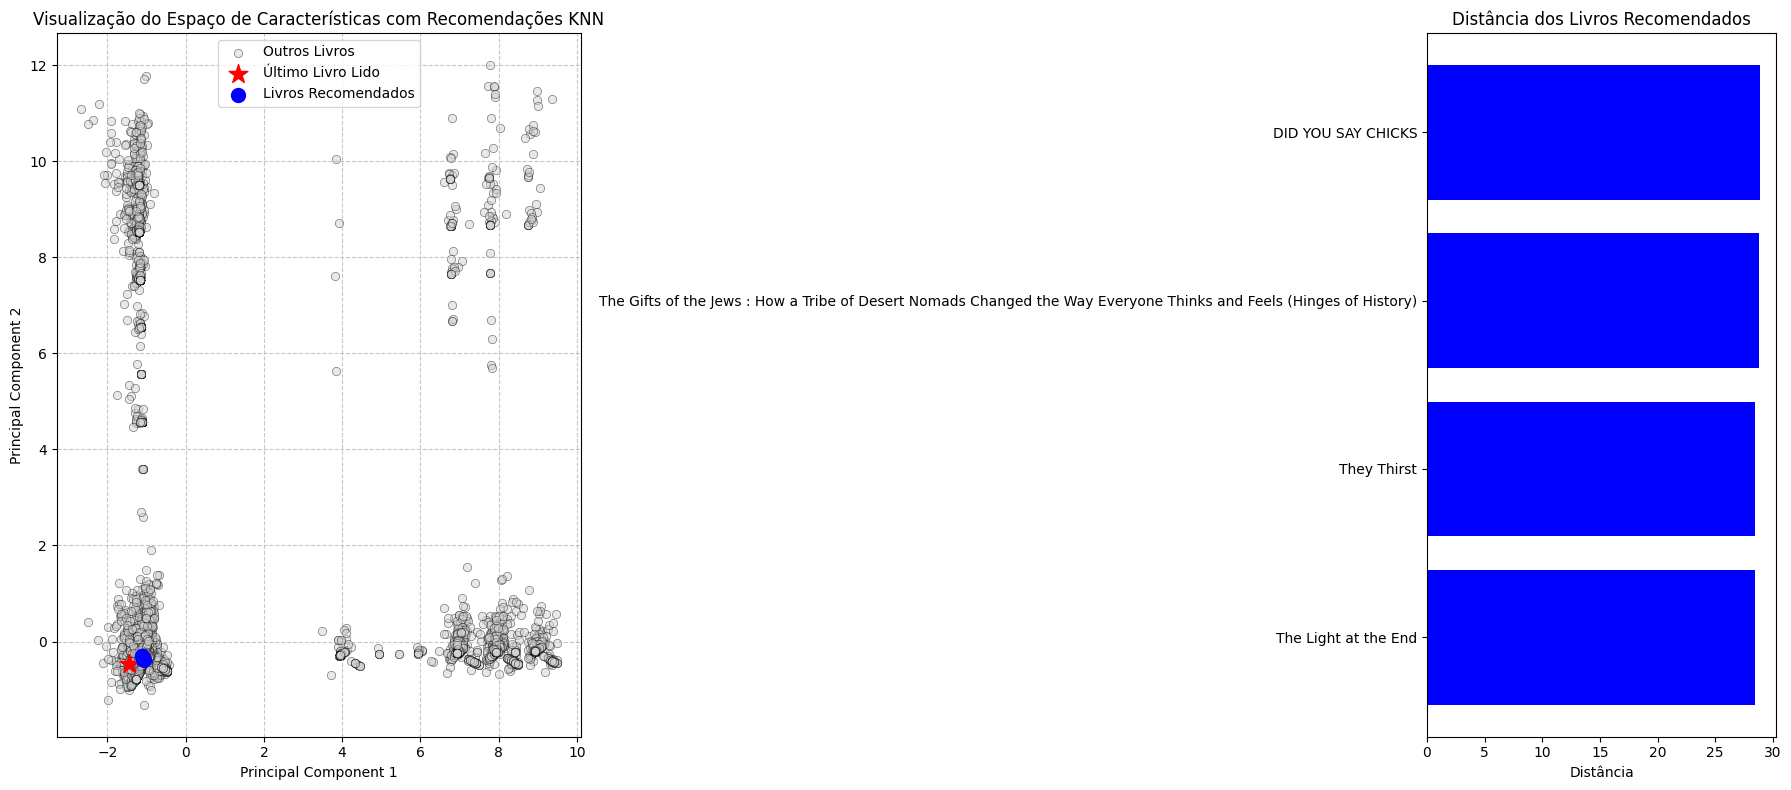

Com base em sua última leitura, acredito que gostaria de ler os livros listados abaixo:
                                   Livro Recomendado  Distância
1                               The Light at the End  28.425341
2                                        They Thirst  28.442925
3  The Gifts of the Jews : How a Tribe of Desert ...  28.774989
4                                 DID YOU SAY CHICKS  28.861739


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# INTERAÇÃO COM O MODELO
ultimo_livro_lido = input("Qual o nome do último livro que você leu? ")

# Tratamento de entrada
while ultimo_livro_lido not in books_pivot.index:
    print("Livro não encontrado. Por favor, insira um livro válido.")
    ultimo_livro_lido = input("Qual o nome do último livro que você leu? ")

# Obtenha as sugestões do modelo
distancia, sugestoes = Knn_Books.kneighbors(books_pivot.loc[[ultimo_livro_lido]])

# Crie um DataFrame com os livros recomendados e suas distâncias
recomendacoes_df = pd.DataFrame({
    'Livro Recomendado': books_pivot.index[sugestoes[0]],
    'Distância': distancia[0]
})

# Remova o livro indicado pelo usuário da lista de recomendações
recomendacoes_df = recomendacoes_df[recomendacoes_df['Livro Recomendado'] != ultimo_livro_lido]

# Ordene o DataFrame pelo ranking (distância)
recomendacoes_df = recomendacoes_df.sort_values(by='Distância')

# Reduza as dimensões usando PCA para visualização
pca = PCA(n_components=2)
livros_pca = pca.fit_transform(books_pivot)

# Plotar o gráfico de dispersão com as recomendações e gráfico de barras ao lado
fig, axs = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [3, 2]})

# Scatter plot para todos os livros
axs[0].scatter(livros_pca[:, 0], livros_pca[:, 1], alpha=0.5, label='Outros Livros', color='lightgray', edgecolors='black', linewidths=0.5)

# Destaque o último livro lido
ultimo_livro_pca = pca.transform(books_pivot.loc[[ultimo_livro_lido]])
axs[0].scatter(ultimo_livro_pca[:, 0], ultimo_livro_pca[:, 1], color='red', marker='*', s=200, label='Último Livro Lido')

# Destaque os livros recomendados
recomendacoes_pca = pca.transform(books_pivot.loc[recomendacoes_df['Livro Recomendado']])
axs[0].scatter(recomendacoes_pca[:, 0], recomendacoes_pca[:, 1], color='blue', marker='o', s=100, label='Livros Recomendados')


# Adicionar gráfico de barras ao lado direito
axs[1].barh(recomendacoes_df['Livro Recomendado'], recomendacoes_df['Distância'], color='blue')
axs[1].set_xlabel('Distância')
axs[1].set_title('Distância dos Livros Recomendados')

# Ajustar o layout e adicionar elementos visuais
axs[0].set_title('Visualização do Espaço de Características com Recomendações KNN')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprima a recomendação
print(f"Com base em sua última leitura, acredito que gostaria de ler os livros listados abaixo:")
print(recomendacoes_df[['Livro Recomendado', 'Distância']])


>## Random-Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Frameworks
import pandas as pd #Dados
import numpy as np #Matrizes

# Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Armazenando dados
livros = pd.read_csv('dados_limpos_6.csv')

# Criando um DataFrame com os dados dos livros
dados_livros = pd.DataFrame(livros)

dados_livros.head()

In [ ]:
#Verificando linhas e colunas
dados_livros.shape

In [ ]:
#Analisando o Descritivo
dados_livros.describe()

In [ ]:
#Analise a avaliação
plt.title('Analisando a avaliação')
sns.boxplot(data=dados_livros, x='Book-Rating');

In [ ]:
# Definindo as features e o target
X = dados_livros['Book-Author']
y = dados_livros['Book-Rating']

# Convertendo o texto em vetores usando TF_IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste 80 teste 20 treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
#Criando o modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#Treinando o modelo
modelo.fit(X_train, y_train)

In [ ]:
#Avaliando a precisão do modelo
precisao_score = modelo.score(X_test, y_test)
print(f'Preciso do modelo: {precisao_score * 100:2f}%')

In [ ]:
ultimo_autor_lido = input("Digite um autor do seu livro lido:")
vetorizado = vectorizer.transform([ultimo_autor_lido])
previsao = modelo.predict(vetorizado)

Digite um autor do seu livro lido:Stephen king


In [ ]:
dados_livros['Book-Title'] = dados_livros['Book-Title'].astype('category')
autor_previsto = dados_livros['Book-Title'].cat.categories[previsao[0]]
print(f"Pesquisando o auto {ultimo_autor_lido} do seu livro lido,")
print(f"Recomendamos este outro livro: {autor_previsto}")

Pesquisando o auto Stephen king do seu livro lido,
Recomendamos este outro livro:  The Secret of the Old Clock (Nancy Drew, Book 1)


**Resultados e Conclusões finais**


A métrica adotada foi recomendar novos livros com base na última leitura do usuário, considerando avaliações anteriores de outros usuários que leram e aprovaram aquele livro

O modelo do KNN nos mostrou assertivamente o objetivo desejado.

Em nosso caso, os outros dois modelos de ML foram descartados pela sua complexidade, coherencia e exatidão nos dados resultantes.


